In [1]:
import sys
sys.path.append("../")
import torch
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler,AutoencoderKL
from lora_diffusion import tune_lora_scale, patch_pipe
from PIL import Image
from z_dataset import z_Dataset
from torchvision import transforms
from z_net import Downnet, I2T_Prompt
from visualization import jupyter_prompt_based_generation, only_text_prompt_generation

model_id = "stabilityai/stable-diffusion-2-1-base"

with torch.no_grad():
    pipe = StableDiffusionPipeline.from_pretrained(model_id).to("cuda")
    pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
    vae = AutoencoderKL.from_pretrained(model_id, subfolder = "vae", revision = None).to("cuda")
    patch_pipe(pipe,
    "./output/addemb_1.0text_reg_lr1e-4/checkpoint/lora_weight_e11_s4000.pt",
    patch_text=False,
    patch_ti=False,
    patch_unet=True,)
    img_downnet = Downnet(img_channel=4).to("cuda")
    img2txt_prompt_model = I2T_Prompt(down_net=img_downnet, text_emb_size=1024, linear_dim = 3600 ).to("cuda")
    info = torch.load("./output/addemb_1.0text_reg_lr1e-4/checkpoint/lora_weight_e11_s4000.i2tp.pt")
    img2txt_prompt_model.load_state_dict(info)

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

/home/chenhong/anaconda3/envs/diffusion/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


LoRA : Patching Unet


In [2]:
import numpy as np
prompt = "in the many colorful flowers"
img_resolution = 512
guidance = 0.0
img_weight = 0.0
ref_image = Image.open("./training_data/unseen_images/bike1.jpg").convert("RGB").resize((img_resolution, img_resolution))
#ref_image = np.zeros((3,img_resolution,img_resolution),dtype=np.float32)
gen_img = jupyter_prompt_based_generation(pipe, vae, img2txt_prompt_model,prompt, ref_image, guidance, img_weight)
# gen_img = only_text_prompt_generation(pipe, prompt, guidance)

  0%|          | 0/50 [00:00<?, ?it/s]

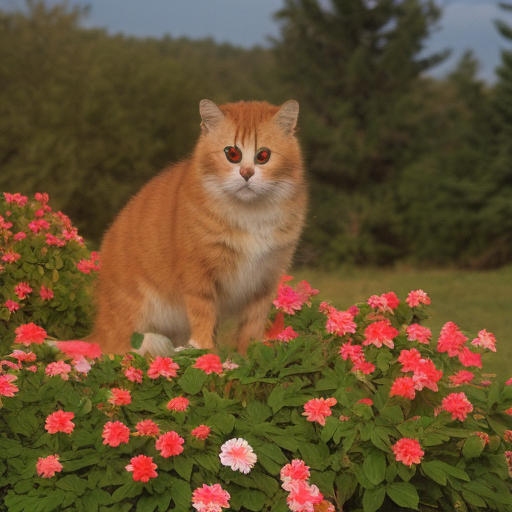

In [3]:
gen_img[0]